In [89]:
import time 
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

#function that draws graph
def drawGraph(G):
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos)
    plt.show()

# IRREDUCIBILITY


In [120]:
def Irr(G):
    
    a = nx.adjacency_matrix(G)
    #print(a)
    A=a.toarray()
    #print(A)
    N= len(A[0])
    #print(N)
    res = np.identity(N)
    #print (res)
    for i in range (N):
        res += np.linalg.matrix_power(A, i)
        
    
    if res.all() >0:
        return True
    else:
        return False

# BFS ALGHORITM

In [41]:
def bfsCheckConnectivity(G, startNode):
        path=[]
        queue = [startNode]
        path.append(startNode)
        while queue:
            
            vertex = queue.pop(0)
            
            
            for current in G.neighbors(vertex):
                if current not in path:
                  
                    path.append(current)
                    queue.append(current)
                    if len(path)== len(G.nodes):
                        return True
        return len(path) == len(G.nodes())

# LAPLACIAN ALGHORITM

In [162]:
def CheckLaplacian(G):
    #L= nx.laplacian_matrix(G, nodelist=None, weight='weight')
    connec= nx.algebraic_connectivity(G, method='lanczos') 
    if connec>0: 
        return True
    else:
        return False
    

## 3)

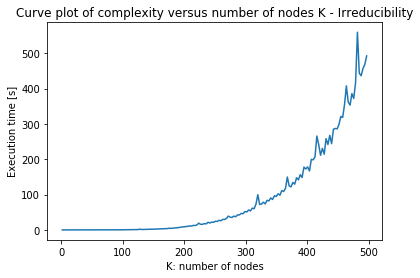

In [181]:
N = 500
timeIrr = []
nodes = []

for i in range(2,N,3):
    p = 0.5
    p_er_graph = nx.erdos_renyi_graph(i, p, seed = None, directed = False)    
    
    start = time.time()
    Irr(p_er_graph)
    end = time.time() - start
    timeIrr.append(end)
    nodes.append(i)
    
    
plt.plot(nodes,timeIrr)
plt.title("Curve plot of complexity versus number of nodes K - Irreducibility")
plt.xlabel('K: number of nodes')
plt.ylabel('Execution time [s]')
plt.show()

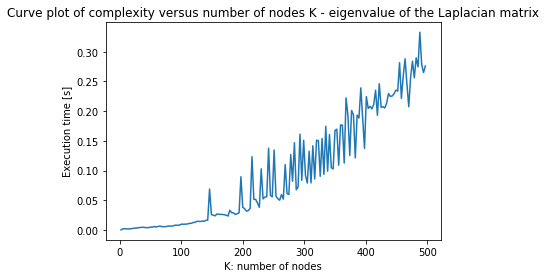

In [163]:
nodes=[]
timesLaplacian=[]
N=500

for i in range(2,N,3):
    p= 0.5
    er_graph= nx.erdos_renyi_graph(i,p,seed=None, directed=False)
    start= time.time()
    CheckLaplacian(er_graph)
    end= time.time()
    total= end-start
    timesLaplacian.append(total)
    nodes.append(i)
plt.plot(nodes, timesLaplacian)
plt.title("Curve plot of complexity versus number of nodes K - eigenvalue of the Laplacian matrix")
plt.xlabel('K: number of nodes')
plt.ylabel('Execution time [s]')
plt.show()

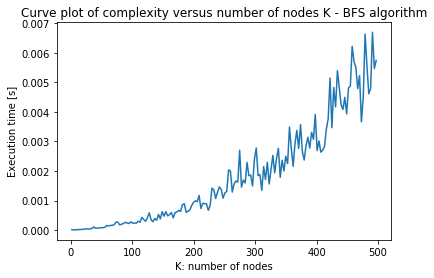

In [209]:
import time
N = 500
timeBFS = []
nodes = []
p=0.5
for i in range(2,N,3):
    #p = random.random()
    #create graph wit i nodes
    G_p_er = nx.erdos_renyi_graph(i,p,seed=None, directed=False)
    start = time.time()
    #check connectivity
    bfsCheckConnectivity(G_p_er, 1)
    endTime = time.time() - start
    #time for this alghorimt about graoh of i nodes
    timeBFS.append(endTime)
    nodes.append(i)
 
    
plt.xlabel('K: number of nodes')
plt.ylabel('Execution time [s]')
plt.title("Curve plot of complexity versus number of nodes K - BFS algorithm")
plt.plot(nodes, timeBFS)

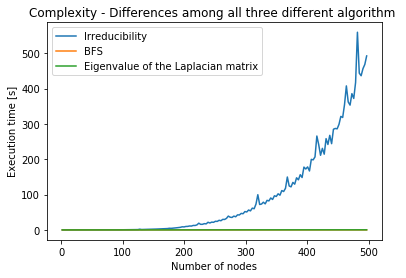

In [212]:
plt.xlabel('Number of nodes')
plt.ylabel('Execution time [s]')
plt.plot(nodes, timeIrr, label="Irreducibility")
plt.plot(nodes, timeBFS, label="BFS")
plt.title("Complexity - Differences among all three different algorithm ")
plt.plot(nodes, timesLaplacian, label = "Eigenvalue of the Laplacian matrix")
plt.legend()

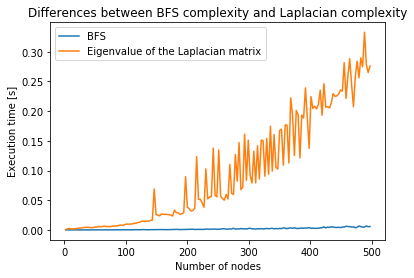

In [213]:
plt.xlabel('Number of nodes')
plt.ylabel('Execution time [s]')
plt.plot(nodes, timeBFS, label="BFS")
plt.title("Differences between BFS complexity and Laplacian complexity")
plt.plot(nodes, timesLaplacian, label = "Eigenvalue of the Laplacian matrix")
plt.legend()

## 4)

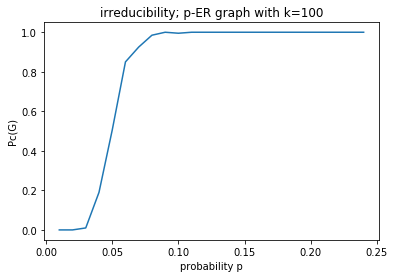

In [182]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def getNumberGraphConnected(connectivity):
    result=0
    for i in connectivity:
        if i == True:
            result+=1   
    return result/200


N=1000

p=0.01
totIRR=[]
probs=[]
while p<0.25:
    connectivity=[]
    probs.append(p)
    for i in range(1,N,5):
        #create graph wit 100 nodes
        G_p_er = nx.erdos_renyi_graph(100,p,seed=None, directed=False)
        #check connectivity
        connectivity.append(Irr(G_p_er))
        
    
    totIRR.append(getNumberGraphConnected(connectivity))
    p+=0.01

plt.title("irreducibility; p-ER graph with k=100")
plt.plot(probs, totIRR)
plt.xlabel('probability p')
plt.ylabel('Pc(G)')
plt.show()

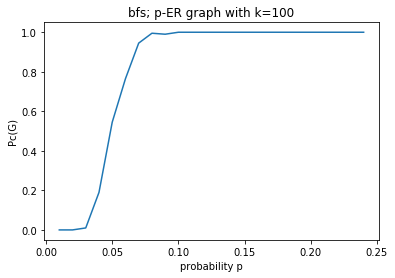

In [164]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def getNumberGraphConnected(connectivity):
    result=0
    for i in connectivity:
        if i == True:
            result+=1   
    return result/200


N=1000

p=0.01
totBFS=[]
probs=[]
while p<0.25:
    connectivity=[]
    probs.append(p)
    for i in range(1,N,5):
        #create graph wit 100 nodes
        G_p_er = nx.erdos_renyi_graph(100,p,seed=None, directed=False)
        #check connectivity
        connectivity.append(bfsCheckConnectivity(G_p_er, 1))
        
    
    totBFS.append(getNumberGraphConnected(connectivity))
    p+=0.01

plt.title("bfs; p-ER graph with k=100")
plt.plot(probs, totBFS)
plt.xlabel('probability p')
plt.ylabel('Pc(G)')
plt.show()

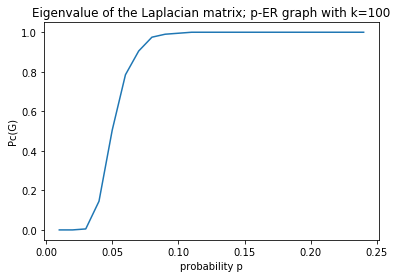

In [178]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def getNumberGraphConnected(connectivity):
    result=0
    for i in connectivity:
        if i == True:
            result+=1   
    return result/200


N=1000

p=0.01
totLaplacian=[]
probs=[]
while p<0.25:

    connectivity=[]
    probs.append(p)
    for i in range(1,N,5):
        #create graph wit 100 nodes
        G_p_er = nx.erdos_renyi_graph(100,p,seed=None, directed=False)
        #check connectivity
        connectivity.append(CheckLaplacian(G_p_er))
        
    
    totLaplacian.append(getNumberGraphConnected(connectivity))
    p+=0.01

plt.title("Eigenvalue of the Laplacian matrix; p-ER graph with k=100")
plt.plot(probs, totLaplacian)
plt.xlabel('probability p')
plt.ylabel('Pc(G)')
plt.show()

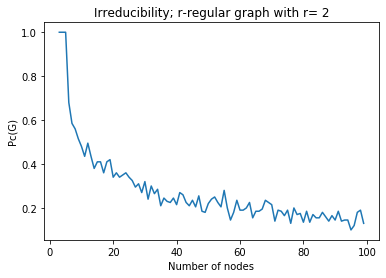

In [180]:
import networkx as nx
import random
import matplotlib.pyplot as plt
N=1000

totirr=[]
nodes=[]
for k in range(3,100):
    connectivity=[]
    nodes.append(k)
    for i in range(1,N,5):
        
        r_regular_graph = nx.random_regular_graph(2, k, seed=None)
        #check connectivity
        connectivity.append(Irr(r_regular_graph))
        
    
    totirr.append(getNumberGraphConnected(connectivity))
   
    
    
plt.title("Irreducibility; r-regular graph with r= 2")
plt.plot(nodes, totirr)
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.show()

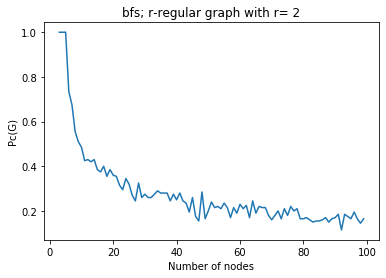

In [174]:
import networkx as nx
import random
import matplotlib.pyplot as plt
N=1000

totBFSregular=[]
nodes=[]
for k in range(3,100):
    connectivity=[]
    nodes.append(k)
    for i in range(1,N,5):
        
        r_regular_graph = nx.random_regular_graph(2, k, seed=None)
        #check connectivity
        connectivity.append(bfsCheckConnectivity(r_regular_graph, 1))
        
    
    totBFSregular.append(getNumberGraphConnected(connectivity))
   
    
    
plt.title("bfs; r-regular graph with r= 2")
plt.plot(nodes, totBFSregular)
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.show()

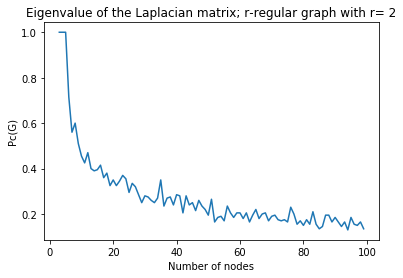

In [177]:
import networkx as nx
import random
import matplotlib.pyplot as plt
N=1000

totLaplacianRegular=[]
nodes=[]
for k in range(3,100):
    connectivity=[]
    nodes.append(k)
    for i in range(1,N,5):
        
        r_regular_graph = nx.random_regular_graph(2, k, seed=None)
        #check connectivity
        connectivity.append(CheckLaplacian(r_regular_graph))
        
    
    totLaplacianRegular.append(getNumberGraphConnected(connectivity))
   
    
    
plt.title("Eigenvalue of the Laplacian matrix; r-regular graph with r= 2")
plt.plot(nodes, totLaplacianRegular)
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.show()

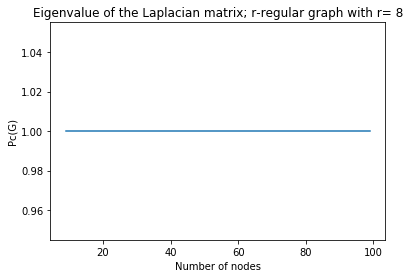

In [176]:
import networkx as nx
import random
import matplotlib.pyplot as plt
N=1000

totLaplacianRegular8=[]
nodes=[]
for k in range(9,100):
    connectivity=[]
    nodes.append(k)
    for i in range(1,N,5):
        
        r_regular_graph = nx.random_regular_graph(8, k, seed=None)
        #check connectivity
        connectivity.append(CheckLaplacian(r_regular_graph))
        
    
    totLaplacianRegular8.append(getNumberGraphConnected(connectivity))
plt.title("Eigenvalue of the Laplacian matrix; r-regular graph with r= 8")   
plt.plot(nodes, totLaplacianRegular8)
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.show()

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
N=1000

totBFSRegular8=[]
nodes=[]
for k in range(9,106):
    connectivity=[]
    nodes.append(k)
    for i in range(1,N,5):
        
        r_regular_graph = nx.random_regular_graph(8, k, seed=None)
        #check connectivity
        connectivity.append(Irr(r_regular_graph))
        
    
    totBFSRegular8.append(getNumberGraphConnected(connectivity))
plt.title("Irreducibility; r-regular graph with r= 8")   
plt.plot(nodes, totBFSRegular8)
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.show()

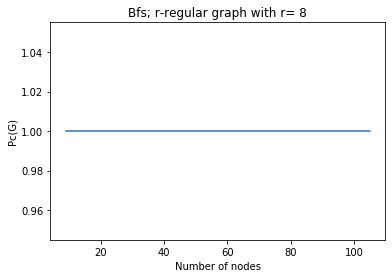

In [200]:
import networkx as nx
import random
import matplotlib.pyplot as plt
N=1000

totBFSRegular8=[]
nodes=[]
for k in range(9,106):
    connectivity=[]
    nodes.append(k)
    for i in range(1,N,5):
        
        r_regular_graph = nx.random_regular_graph(8, k, seed=None)
        #check connectivity
        connectivity.append(bfsCheckConnectivity(r_regular_graph, 1))
        
    
    totBFSRegular8.append(getNumberGraphConnected(connectivity))
plt.title("Bfs; r-regular graph with r= 8")   
plt.plot(nodes, totBFSRegular8)
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.show()

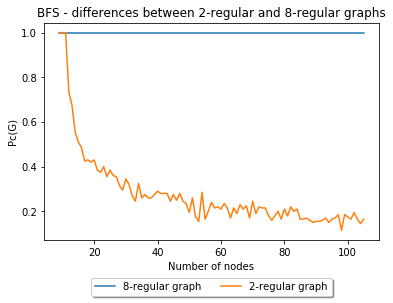

In [208]:
plt.xlabel('Number of nodes')
plt.ylabel('Pc(G)')
plt.plot(nodes, totBFSRegular8, label="8-regular graph")
plt.plot(nodes, totBFSregular, label = "2-regular graph")
plt.title("BFS - differences between 2-regular and 8-regular graphs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)